In [24]:
import pandas as pd

## Loading Dataset

In [25]:
col=['id','Name','Genre','Description']
df= pd.read_csv('train_data.txt',delimiter=':::',header=None,names=col,engine='python')
print(df.head())

   id                                Name       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [26]:
df.isnull().sum()

id             0
Name           0
Genre          0
Description    0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   Name         54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [28]:
dup_data=df.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [29]:
cols=['id','Name','Description']
testdf= pd.read_csv('test_data.txt',delimiter=':::',header=None,names=cols,engine='python')
print(testdf.head())

   id                           Name  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [30]:
import nltk 
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nupur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preprocessing

In [31]:
def clean(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r"https?://[^\s]+", "", text)
    
    # Remove non-alphabetic characters and punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    
    return text


In [32]:
df['Description']=df['Description'].apply(clean)
df.head()

In [ ]:
testdf['Description']=testdf['Description'].apply(clean)
testdf.head()

,id,Name,Description
0,1,Edgar's Lunch (1998),lr brane love life car apart job especi girlfr...
1,2,La guerra de papá (1977),spain march 1964 quico naughti child three bel...
2,3,Off the Beaten Track (2010),one year life albin famili shepherd north tran...
3,4,Meu Amigo Hindu (2015),father die hasnt spoken brother 10 year seriou...
4,5,Er nu zhai (1955),known intern martial art superstar bruce lee a...


## Data Visualisation

C:\Users\nupur\AppData\Local\Temp\ipykernel_38312\2585308014.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, palette='pastel')


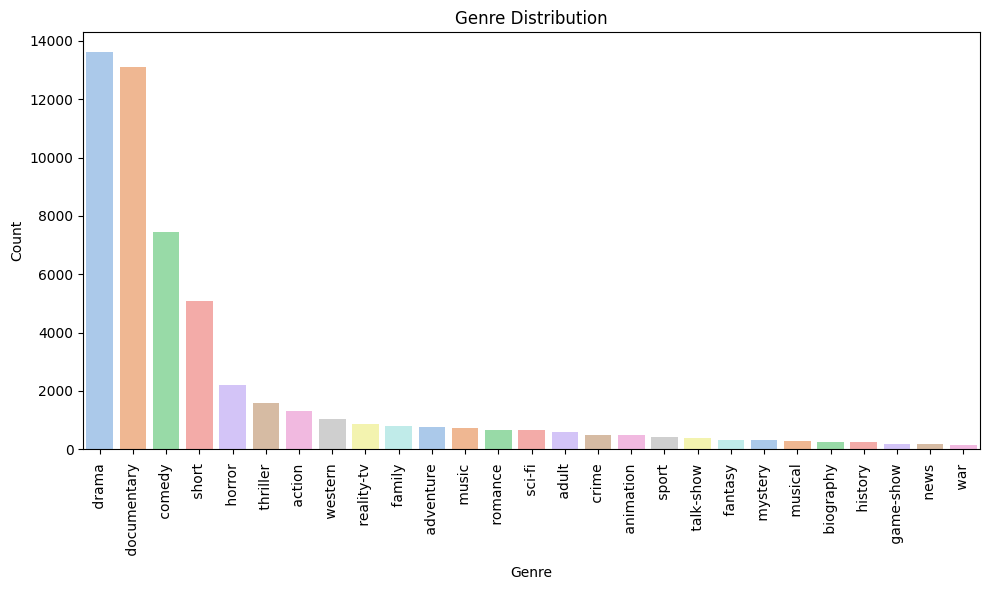

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of genres in the training dataset
plt.figure(figsize=(10,6))
sns.countplot(x='Genre', data=df, order=df['Genre'].value_counts().index, palette='pastel')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensures the plot fits correctly in the figure
plt.show()


## Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=5)
X = tfidf.fit_transform(df['Description'])
y = df['Genre']

## Split Data and Train Model 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training 

In [ ]:

'''from sklearn.naive_bayes import MultinomialNB
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)
//accuracy is 0.517
multi lreg has igher 0.58'''

from sklearn.svm import LinearSVC

# Initialize SVM classifier
svm_classifier = LinearSVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)
# Predict on the test data
y_pred = svm_classifier.predict(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate accuracy or other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 0.5886747210181684


c:\Users\nupur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nupur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.55      0.27      0.36       263
       adult        0.87      0.24      0.38       112
   adventure        0.48      0.17      0.25       139
   animation        0.50      0.10      0.16       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.61      0.56      1443
       crime        0.33      0.02      0.04       107
 documentary        0.68      0.84      0.75      2659
       drama        0.54      0.79      0.64      2697
      family        0.45      0.09      0.15       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.95      0.50      0.66        40
     history        0.00      0.00      0.00        45
      horror        0.65      0.58      0.61       431
       music        0.63      0.48      0.55       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

c:\Users\nupur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Transform the test data
X_test_new = tfidf.transform(testdf['Description'])

test_predictions = logreg.predict(X_test_new)

testdf['Predicted_Genre'] = test_predictions
testdf.to_csv('predicted_test_data.csv', index=False)

print(testdf.head())

   id                           Name  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description Predicted_Genre  
0  lr brane love life car apart job especi girlfr...          drama   
1  spain march 1964 quico naughti child three bel...          drama   
2  one year life albin famili shepherd north tran...    documentary   
3  father die hasnt spoken brother 10 year seriou...          drama   
4  known intern martial art superstar bruce lee a...          drama   
